
#Reading Dataset


In [2]:
#reading dataset
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/tweets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB




#Checking for null values


In [3]:
#checking for null values
df.isnull()

id  keyword  location   text  target
0      False    False      True  False   False
1      False    False      True  False   False
2      False    False     False  False   False
3      False    False     False  False   False
4      False    False      True  False   False
...      ...      ...       ...    ...     ...
11365  False    False     False  False   False
11366  False    False     False  False   False
11367  False    False     False  False   False
11368  False    False     False  False   False
11369  False    False      True  False   False

[11370 rows x 5 columns]

#Count of null values

In [4]:
#count of null values
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

#To analyze numerical data

In [5]:
#To analyze numerical data
df.describe()

id        target
count  11370.000000  11370.000000
mean    5684.500000      0.185928
std     3282.380615      0.389066
min        0.000000      0.000000
25%     2842.250000      0.000000
50%     5684.500000      0.000000
75%     8526.750000      0.000000
max    11369.000000      1.000000

#Data Exploration and visualization

<ipython-input-6-409f21b90e71>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


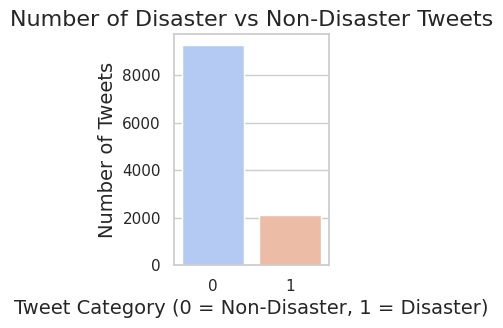

In [6]:
#data exploration and visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(2,3))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Number of Disaster vs Non-Disaster Tweets', fontsize=16)
plt.xlabel('Tweet Category (0 = Non-Disaster, 1 = Disaster)', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

plt.show()

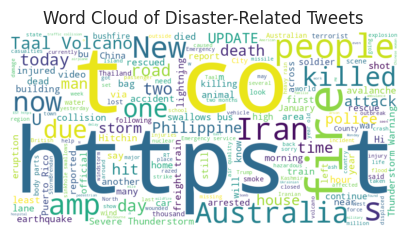

In [7]:
# Required Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

disaster_tweets = df[df['target'] == 1]['text']  # Filter disaster-related tweets

# Combine all tweets into one string
all_disaster_tweets = ' '.join(disaster_tweets)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_disaster_tweets)

# Display the word cloud
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster-Related Tweets')
plt.show()


#Convering the data into lowercase

In [8]:
#importing necessary libraries
import re
import nltk
from sklearn.model_selection import train_test_split


In [9]:
def To_Lowercase(string):
    return string.lower()

In [10]:
df['text']=df['text'].apply(To_Lowercase)
df

id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      communal violence in bhainsa, telangana. "ston...       1  
1      telangana: section 144 has been imposed in bha...       1  
2      arsonist sets cars ablaze at dealership https:...       1  
3      arsonist sets cars ablaze at dealership https:...       1  
4      "lord jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  media should have warned us well in advance. t...       0  
11366  i feel directly attacked 💀 i consider moonbin ...       0  
11367  i feel directly attacked 💀 i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? t...       0  
11369     jake corway wrecked while running 14th at irp.       1  

[11370 rows x 5 columns]

#Removing URLs

In [11]:
#Function to remove URLs
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [12]:
#remvoing URLs and displaying
df['text'] = df['text'].apply(Remove_Url)
df

id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      communal violence in bhainsa, telangana. "ston...       1  
1      telangana: section 144 has been imposed in bha...       1  
2               arsonist sets cars ablaze at dealership        1  
3              arsonist sets cars ablaze at dealership         1  
4      "lord jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  media should have warned us well in advance. t...       0  
11366  i feel directly attacked 💀 i consider moonbin ...       0  
11367  i feel directly attacked 💀 i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? t...       0  
11369     jake corway wrecked while running 14th at irp.       1  

[11370 rows x 5 columns]

#Handling Emojis

In [13]:
#importing necesarry package to remove emojis
!pip install demoji
import demoji

#function to remove emojies
demoji.download_codes()
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.2 MB/s eta 0:00:00


<ipython-input-13-9d0a01471994>:6: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [14]:
#Removing emojis and displaying
df['text'] = df['text'].apply(Handle_emoji)
df

id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      communal violence in bhainsa, telangana. "ston...       1  
1      telangana: section 144 has been imposed in bha...       1  
2               arsonist sets cars ablaze at dealership        1  
3              arsonist sets cars ablaze at dealership         1  
4      "lord jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  media should have warned us well in advance. t...       0  
11366  i feel directly attacked :skull: i consider mo...       0  
11367  i feel directly attacked :skull: i consider mo...       0  
11368  ok who remember "outcast" nd the "dora" au?? t...       0  
11369     jake corway wrecked while running 14th at irp.       1  

[11370 rows x 5 columns]

#Extracting Hashtags and creating a new column

In [15]:
# Function to extract hashtags from a tweet
def Extract_Hashtags(string):
    return ' '.join(re.findall(r'#(\w+)', string))

# Create a new column for hashtags
df['hashtags'] = df['text'].apply(Extract_Hashtags)

# Check the first few rows to confirm the changes
df[['text', 'hashtags']].head(25)


text                hashtags
0   communal violence in bhainsa, telangana. "ston...                        
1   telangana: section 144 has been imposed in bha...                        
2            arsonist sets cars ablaze at dealership                         
3           arsonist sets cars ablaze at dealership                          
4   "lord jesus, your love brings freedom and pard...                        
5   if this child was chinese, this tweet would ha...                        
6   several houses have been set ablaze in ngemsib...                        
7   asansol: a bjp office in salanpur village was ...                        
8   national security minister, kan dapaah's side ...                        
9   this creature who’s soul is no longer clarent ...                        
10  images showing the havoc caused by the #camero...            cameroon oku
11  social media went bananas after chuba hubbard ...                 okstate
12  hausa youths set area office of apapa-iganmu l...                        
13  under #mamatabanerjee political violence &amp;...          mamatabanerjee
14           amen! set the whole system ablaze, man.                         
15  images showing the havoc caused by the #camero...            cameroon oku
16  no cows today but our local factory is sadly s...          redjanuary2020
17  rengoku sets my heart ablaze:pensive face::red...                    鬼滅の刃
18  paulzizkaphoto: “rundle ablaze” wishing you al...                        
19  french cameroun set houses ablaze in ndu and r...  targeted genocideinsou
20  cameroon's #bir soldiers on the 05/01/2020 inv...   bir southerncameroons
21  as fires ablaze throughout the land/as the pro...                        
22  #thankfultuesday isaiah 43:2 when you pass thr...         thankfultuesday
23  ⠀⠀when you walk through the fire, ⠀⠀you will n...                        
24  originally they were intended to be fired at b...

#Removing Useless Characters

In [16]:
#function to remove useless characters
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring)

In [17]:
#removing useless characters and displaying
df['text'] = df['text'].apply(Remove_UC)
df

id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target hashtags  
0      communal violence bhainsa telangana stones wer...       1           
1      telangana section has been imposed bhainsa fro...       1           
2                  arsonist sets cars ablaze dealership        1           
3                  arsonist sets cars ablaze dealership        1           
4      lord jesus your love brings freedom and pardon...       0           
...                                                  ...     ...      ...  
11365  media should have warned well advance this wre...       0           
11366   feel directly attacked skull consider moonbin...       0           
11367   feel directly attacked skull consider moonbin...       0           
11368   who remember outcast the dora those wrecked o...       0           
11369              jake corway wrecked while running irp       1           

[11370 rows x 6 columns]

#Lemmatization

In [18]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

lemmatizer = WordNetLemmatizer()

# Function to get WordNet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS not found

# Function to lemmatize text with POS tagging
def Lemmatize_Words(text):
    # Tokenize and get POS tags
    words_and_tags = pos_tag(text.split())
    # Lemmatize words based on their POS tags
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in words_and_tags]
    return ' '.join(lemmatized_words)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [19]:
df["text"]=df['text'].apply(Lemmatize_Words)
df.head(25)

id keyword                                           location  \
0    0  ablaze                                                NaN   
1    1  ablaze                                                NaN   
2    2  ablaze                                      New York City   
3    3  ablaze                                     Morgantown, WV   
4    4  ablaze                                                NaN   
5    5  ablaze                                                 OC   
6    6  ablaze                                    London, England   
7    7  ablaze                                             Bharat   
8    8  ablaze                                       Accra, Ghana   
9    9  ablaze                                          Searching   
10  10  ablaze                                                NaN   
11  11  ablaze                                                NaN   
12  12  ablaze                                                NaN   
13  13  ablaze                                          HYDERABAD   
14  14  ablaze                                           Reno, NV   
15  15  ablaze                                                NaN   
16  16  ablaze                                                NaN   
17  17  ablaze                                                NaN   
18  18  ablaze                                          Worldwide   
19  19  ablaze                                                NaN   
20  20  ablaze                                                NaN   
21  21  ablaze                                                NaN   
22  22  ablaze                                              Italy   
23  23  ablaze  ` ˗ˏˋ i'm⠀waiting⠀for⠀you⠀to⠀pour⠀my⠀𝘀𝗶𝗻𝘀⠀onto...   
24  24  ablaze                                         Okielahoma   

                                                 text  target  \
0   communal violence bhainsa telangana stone be p...       1   
1   telangana section have be impose bhainsa from ...       1   
2                  arsonist set car ablaze dealership       1   
3                  arsonist set car ablaze dealership       1   
4   lord jesus your love bring freedom and pardon ...       0   
5   this child be chinese this tweet would have go...       0   
6   several house have be set ablaze ngemsibaa vil...       1   
7   asansol bjp office salanpur village be set abl...       1   
8   national security minister kan dapaahs side ch...       0   
9   this creature whos soul longer clarent but blu...       0   
10  image show the havoc cause the cameroon milita...       1   
11  social medium go banana after chuba hubbard an...       0   
12  hausa youth set area office apapaiganmu local ...       1   
13  under mamatabanerjee political violence amp va...       1   
14               amen set the whole system ablaze man       0   
15  image show the havoc cause the cameroon milita...       1   
16  cow today but our local factory sadly still ab...       1   
17  rengoku set heart ablazepensive facered heartf...       0   
18  paulzizkaphoto rundle ablaze wish you all good...       0   
19  french cameroun set house ablaze ndu and roast...       1   
20  cameroon bir soldier the invade the southernca...       1   
21  fire ablaze throughout the landas the prophosi...       1   
22  thankfultuesday isaiah when you pass through t...       0   
23  when you walk through the fire you will not sc...       0   
24  originally they be intend fired boarder the op...       1   

                  hashtags  
0                           
1                           
2                           
3                           
4                           
5                           
6                           
7                           
8                           
9                           
10            cameroon oku  
11                 okstate  
12                          
13          mamatabanerjee  
14                          
15            cameroon oku  
16          redjanuary202

#Removing Stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Download stopwords list
nltk.download('stopwords')
nltk.download('punkt')  # Needed for tokenization

# Initialize stop words set
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove stopwords
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    return ' '.join(filtered_sentence)

# Assuming 'df' is your DataFrame with a 'text' column
# Apply stopword removal to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

# Check the result
df.head(25)  # Display first 25 rows of the dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


id keyword                                           location  \
0    0  ablaze                                                NaN   
1    1  ablaze                                                NaN   
2    2  ablaze                                      New York City   
3    3  ablaze                                     Morgantown, WV   
4    4  ablaze                                                NaN   
5    5  ablaze                                                 OC   
6    6  ablaze                                    London, England   
7    7  ablaze                                             Bharat   
8    8  ablaze                                       Accra, Ghana   
9    9  ablaze                                          Searching   
10  10  ablaze                                                NaN   
11  11  ablaze                                                NaN   
12  12  ablaze                                                NaN   
13  13  ablaze                                          HYDERABAD   
14  14  ablaze                                           Reno, NV   
15  15  ablaze                                                NaN   
16  16  ablaze                                                NaN   
17  17  ablaze                                                NaN   
18  18  ablaze                                          Worldwide   
19  19  ablaze                                                NaN   
20  20  ablaze                                                NaN   
21  21  ablaze                                                NaN   
22  22  ablaze                                              Italy   
23  23  ablaze  ` ˗ˏˋ i'm⠀waiting⠀for⠀you⠀to⠀pour⠀my⠀𝘀𝗶𝗻𝘀⠀onto...   
24  24  ablaze                                         Okielahoma   

                                                 text  target  \
0   communal violence bhainsa telangana stone pelt...       1   
1   telangana section impose bhainsa january clash...       1   
2                  arsonist set car ablaze dealership       1   
3                  arsonist set car ablaze dealership       1   
4   lord jesus love bring freedom pardon fill holy...       0   
5   child chinese tweet would go viral social medi...       0   
6   several house set ablaze ngemsibaa village oku...       1   
7   asansol bjp office salanpur village set ablaze...       1   
8   national security minister kan dapaahs side ch...       0   
9   creature whos soul longer clarent blue ablaze ...       0   
10  image show havoc cause cameroon military torch...       1   
11  social medium go banana chuba hubbard announce...       0   
12  hausa youth set area office apapaiganmu local ...       1   
13  mamatabanerjee political violence amp vandalis...       1   
14                   amen set whole system ablaze man       0   
15  image show havoc cause cameroon military torch...       1   
16  cow today local factory sadly still ablaze red...       1   
17  rengoku set heart ablazepensive facered heartf...       0   
18     paulzizkaphoto rundle ablaze wish good evening       0   
19  french cameroun set house ablaze ndu roast two...       1   
20  cameroon bir soldier invade southerncameroons ...       1   
21  fire ablaze throughout landas prophosized apoc...       1   
22             thankfultuesday isaiah pass water pass       0   
23          walk fire scorch flame set ablaze product       0   
24  originally intend fired boarder oppose ship cr...       1   

                  hashtags  
0                           
1                           
2                           
3                           
4                           
5                           
6                           
7                           
8                           
9                           
10            cameroon oku  
11                 okstate  
12                          
13          mamatabanerjee  
14                          
15            cameroon oku  
16          redjanuary202

#Spliting the Dataset

In [21]:

#Differentiating features and target
X = df[["id", "keyword", "location", "text"]]  # Features
y = df["target"]  # Labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Before Applying SMOTE**

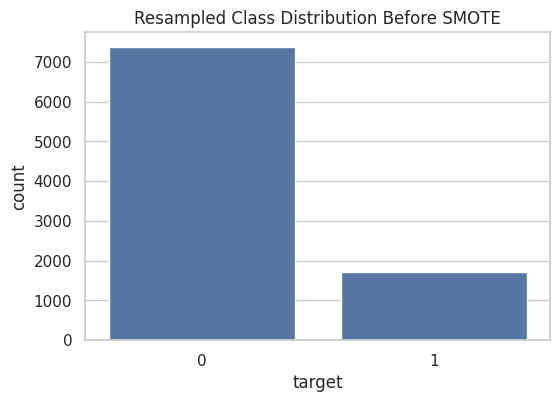

In [22]:
# Visualize the resampled class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Resampled Class Distribution Before SMOTE")
plt.show()

#Applying SMOTE

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Define your feature and target columns
X = df[["id", "keyword", "location", "text"]]  # Features
y = df["target"]  # Target labels

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the text and categorical columns
# Ensure 'text', 'keyword', and 'location' columns are processed correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text'),              # 'text' column
        ('keyword', TfidfVectorizer(), 'keyword'),        # 'keyword' column
        ('location', OneHotEncoder(handle_unknown='ignore'), ['location'])  # 'location' column (categorical)
    ],
    remainder='passthrough'  # Keeps 'id' column as-is
)

# Step 4: Fit the preprocessor to your training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Step 5: Apply the same transformation to the test set
X_test_transformed = preprocessor.transform(X_test)

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_transformed, y_train)
# Step 6: Apply SMOTE to the transformed training data
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

# Now X_resampled and y_resampled contain the balanced training data


**After Applying SMOTE**

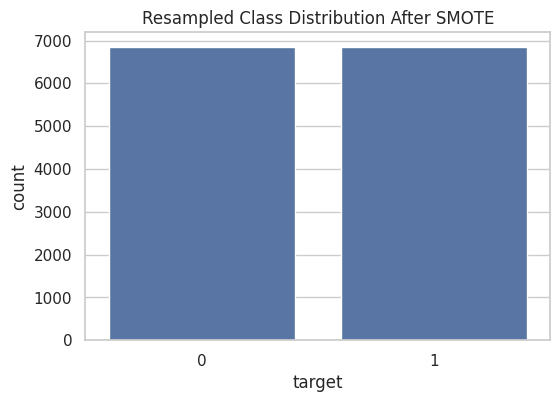

In [24]:
# Visualize the resampled class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Resampled Class Distribution After SMOTE")
plt.show()

The data has been balanced after applying smote

#Model Training and Evaluation
**Random Forest**


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_transformed and y_resampled are your preprocessed, vectorized, and balanced training data,
# and X_test_transformed and y_test are the vectorized test features and true test labels.

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the balanced and vectorized training data
model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9014951627088831

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1878
           1       0.84      0.54      0.66       396

    accuracy                           0.90      2274
   macro avg       0.87      0.76      0.80      2274
weighted avg       0.90      0.90      0.89      2274



**Random Forest without Smote**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Define your feature and target columns
X = df[["id", "keyword", "location", "text"]]  # Features
y = df["target"]  # Target labels

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the text and categorical columns
# Ensure 'text', 'keyword', and 'location' columns are processed correctly
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text'),              # 'text' column
        ('keyword', TfidfVectorizer(), 'keyword'),        # 'keyword' column
        ('location', OneHotEncoder(handle_unknown='ignore'), ['location'])  # 'location' column (categorical)
    ],
    remainder='passthrough'  # Keeps 'id' column as-is
)

# Step 4: Fit the preprocessor to your training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Step 5: Apply the same transformation to the test set
X_test_transformed = preprocessor.transform(X_test)

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the transformed training data
model.fit(X_train_transformed, y_train) # Changed X_train to X_train_transformed

# Make predictions on the transformed test data
y_pred = model.predict(X_test_transformed) # Changed X_test to X_test_transformed

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8962181178540017

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1878
           1       0.86      0.48      0.62       396

    accuracy                           0.90      2274
   macro avg       0.88      0.73      0.78      2274
weighted avg       0.89      0.90      0.88      2274



**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model on the balanced training data
logistic_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test_transformed)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8641160949868074

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1878
           1       0.59      0.70      0.64       396

    accuracy                           0.86      2274
   macro avg       0.76      0.80      0.78      2274
weighted avg       0.88      0.86      0.87      2274



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-nearest neighbors**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Train the model on the balanced and vectorized training data
knn_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_transformed)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6904133685136323

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1878
           1       0.31      0.61      0.41       396

    accuracy                           0.69      2274
   macro avg       0.60      0.66      0.60      2274
weighted avg       0.79      0.69      0.72      2274

